In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Corrected file path to match the Resources folder
wine = pd.read_csv('Resources/winequality-red.csv', index_col=0)

# Display sample data
wine.head(10)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [3]:
df = wine.drop('quality', axis='columns').columns.tolist()
print(df)

['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [4]:
total = pd.DataFrame()
total['dtype'] = wine.dtypes
total['unique'] = wine.nunique(axis=0)
total['missing'] = wine.isnull().sum()
total['mean'] = wine.mean()
total['std'] = wine.std()
total

,dtype,unique,missing,mean,std
volatile acidity,float64,143,0,0.527821,0.179060
citric acid,float64,80,0,0.270976,0.194801
residual sugar,float64,91,0,2.538806,1.409928
chlorides,float64,153,0,0.087467,0.047065
free sulfur dioxide,float64,60,0,15.874922,10.460157
total sulfur dioxide,float64,144,0,46.467792,32.895324
density,float64,436,0,0.996747,0.001887
pH,float64,89,0,3.311113,0.154386
sulphates,float64,96,0,0.658149,0.169507
alcohol,float64,65,0,10.422983,1.065668


In [5]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 7.4 to 6.0
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   residual sugar        1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 149.9 KB


In [6]:
wine.isnull().any()


volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
wine.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

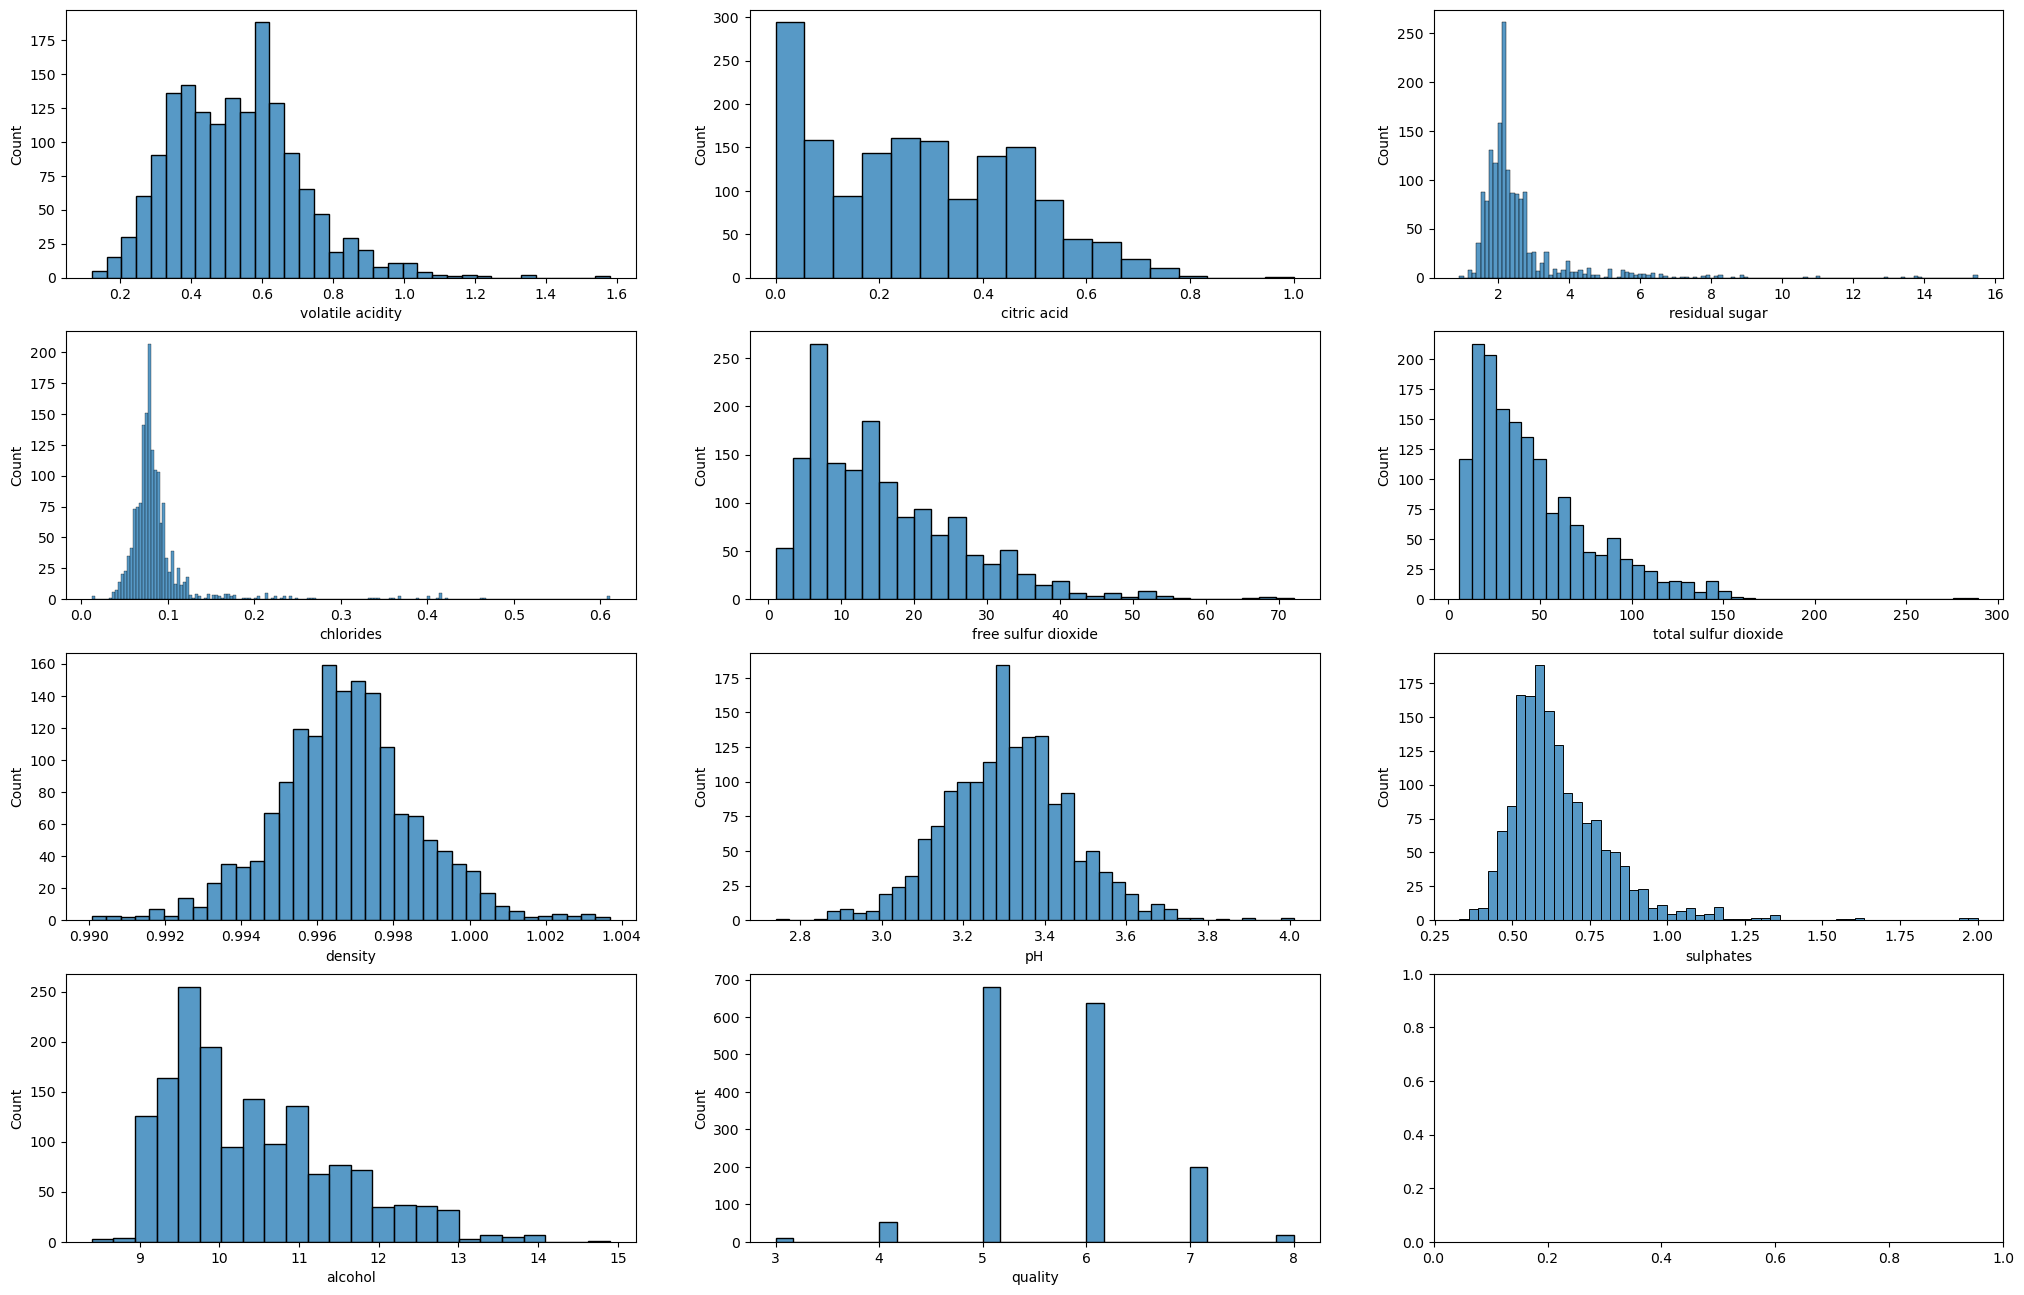

In [8]:
fig , axs = plt.subplots(4,3 , figsize=(25 , 16))

for f , ax in zip(wine.columns , axs.ravel()):
    sns.histplot(data=wine , x=f , ax=ax )
plt.show()

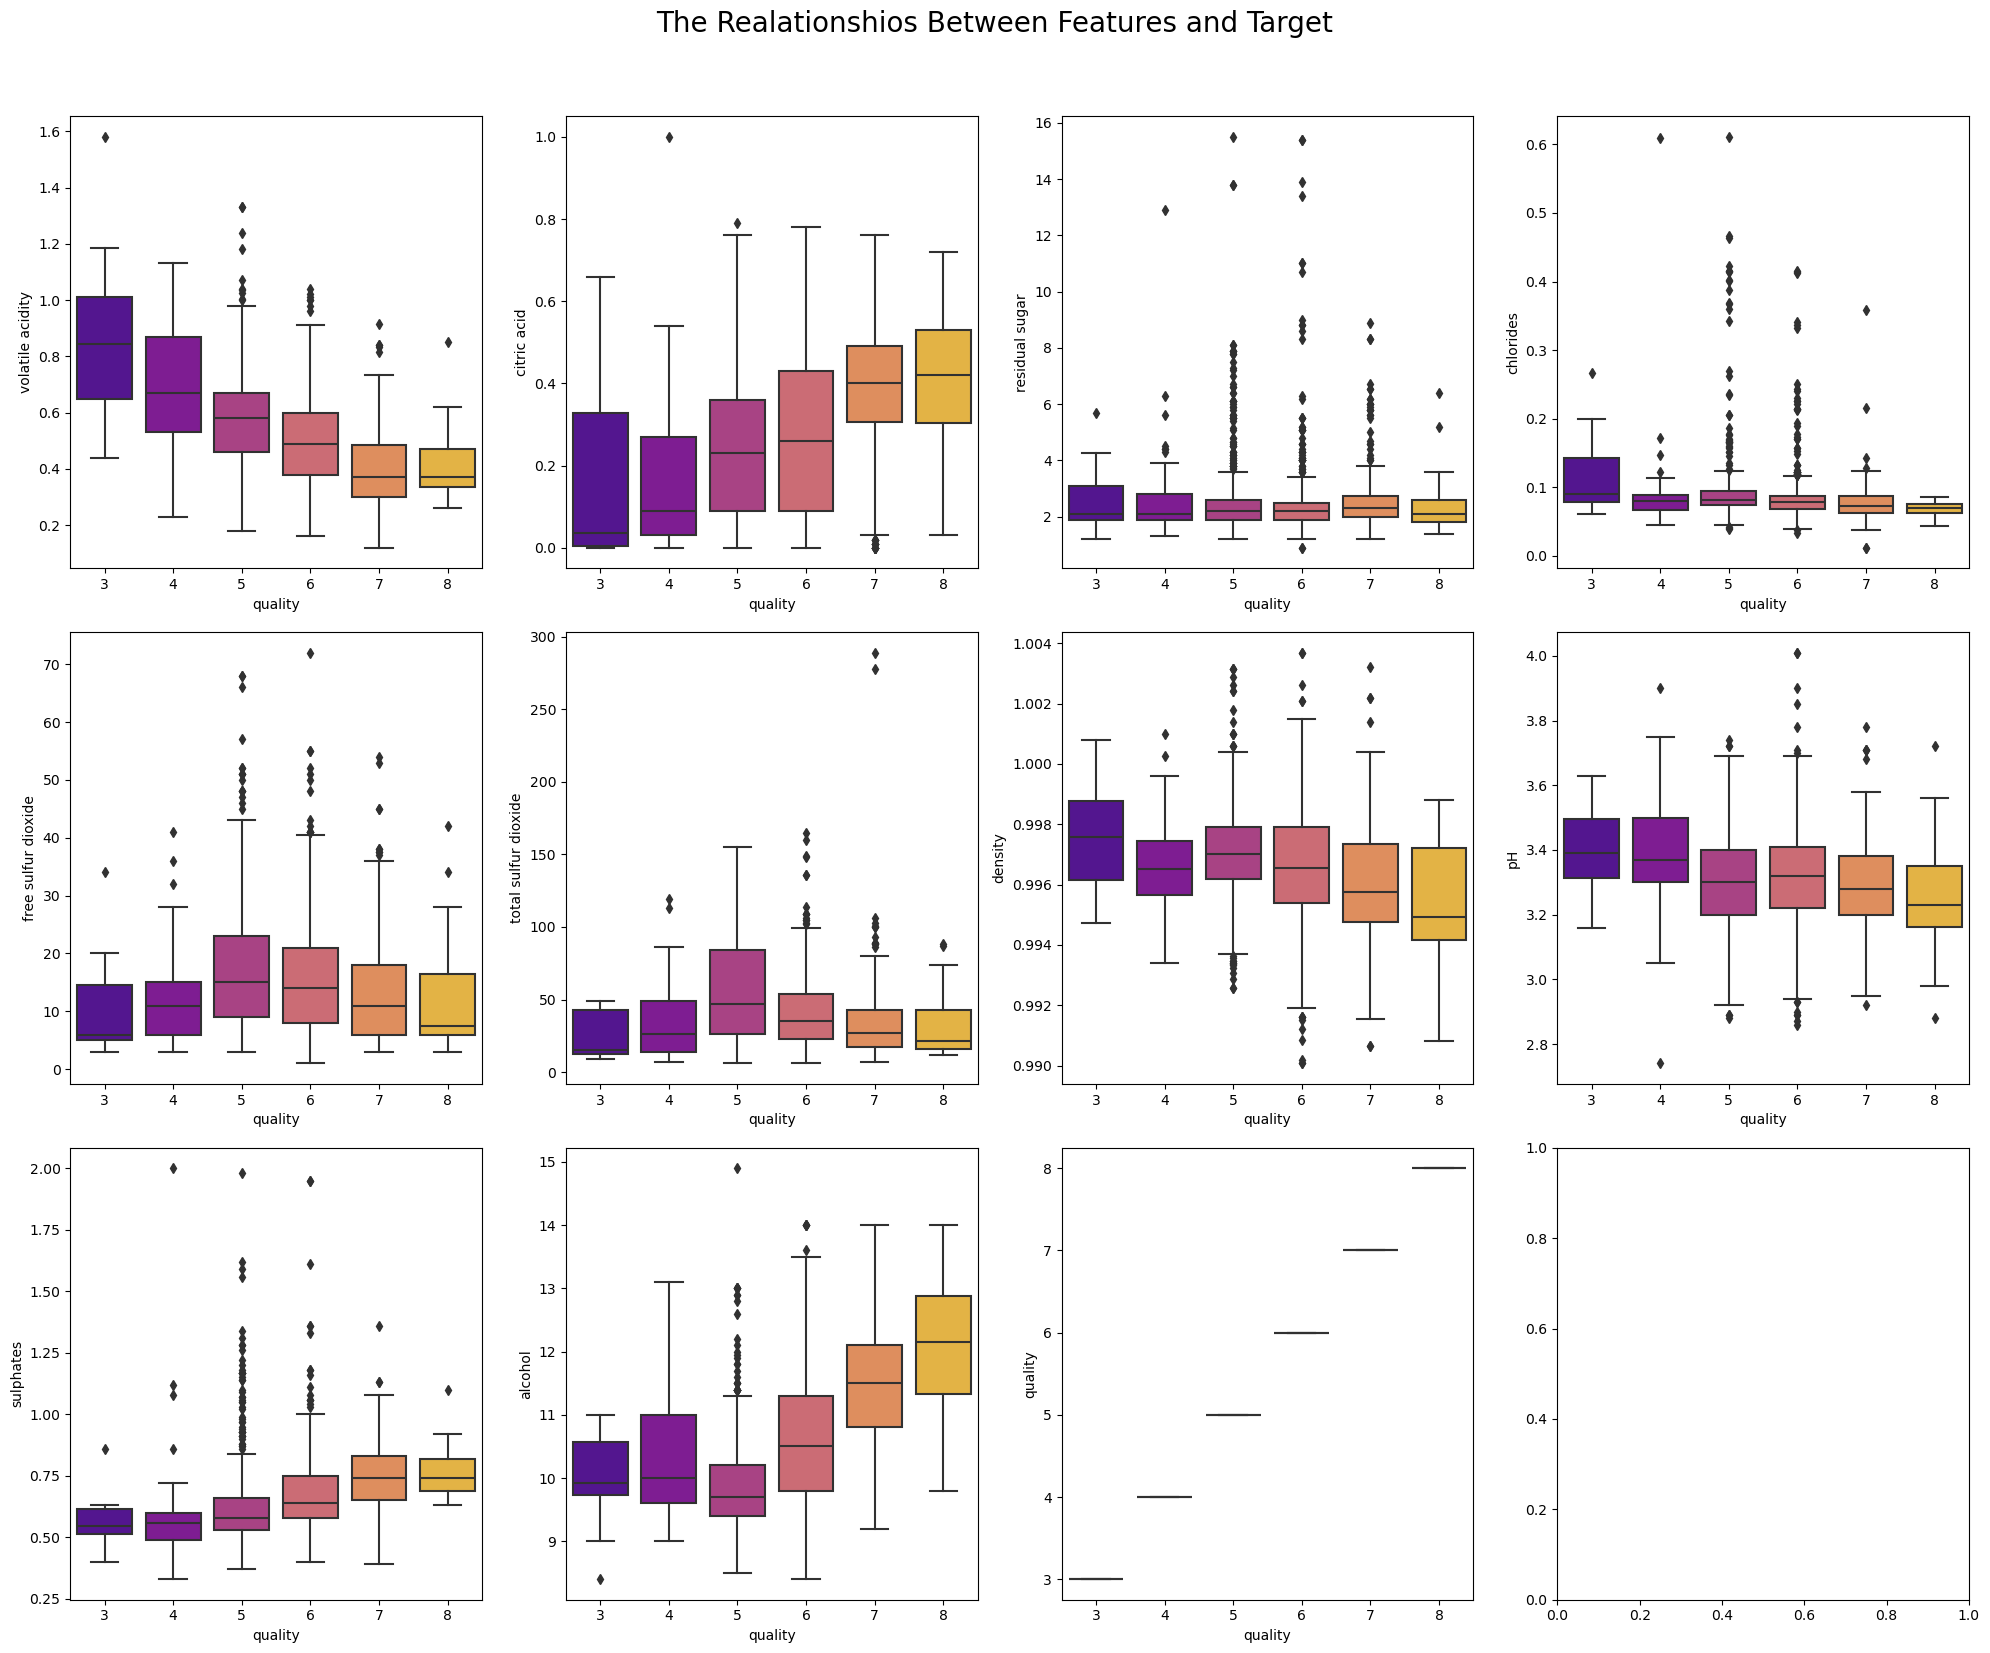

In [9]:
palette = sns.color_palette('plasma')


fig , axs = plt.subplots(3,4 , figsize=(20,16))

for f , ax in zip(wine.columns , axs.ravel()):
    sns.boxplot(data = wine , x='quality' , y=f , ax=ax , palette=palette)
plt.suptitle('The Realationshios Between Features and Target' , y=1.03 , size=20)
plt.tight_layout()

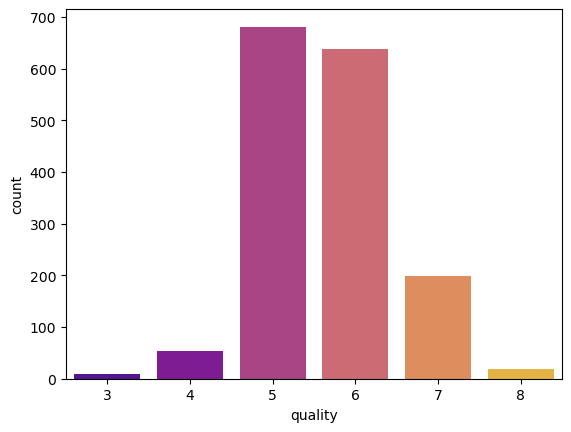

In [11]:
sns.countplot(data=wine , x='quality' , palette=palette);


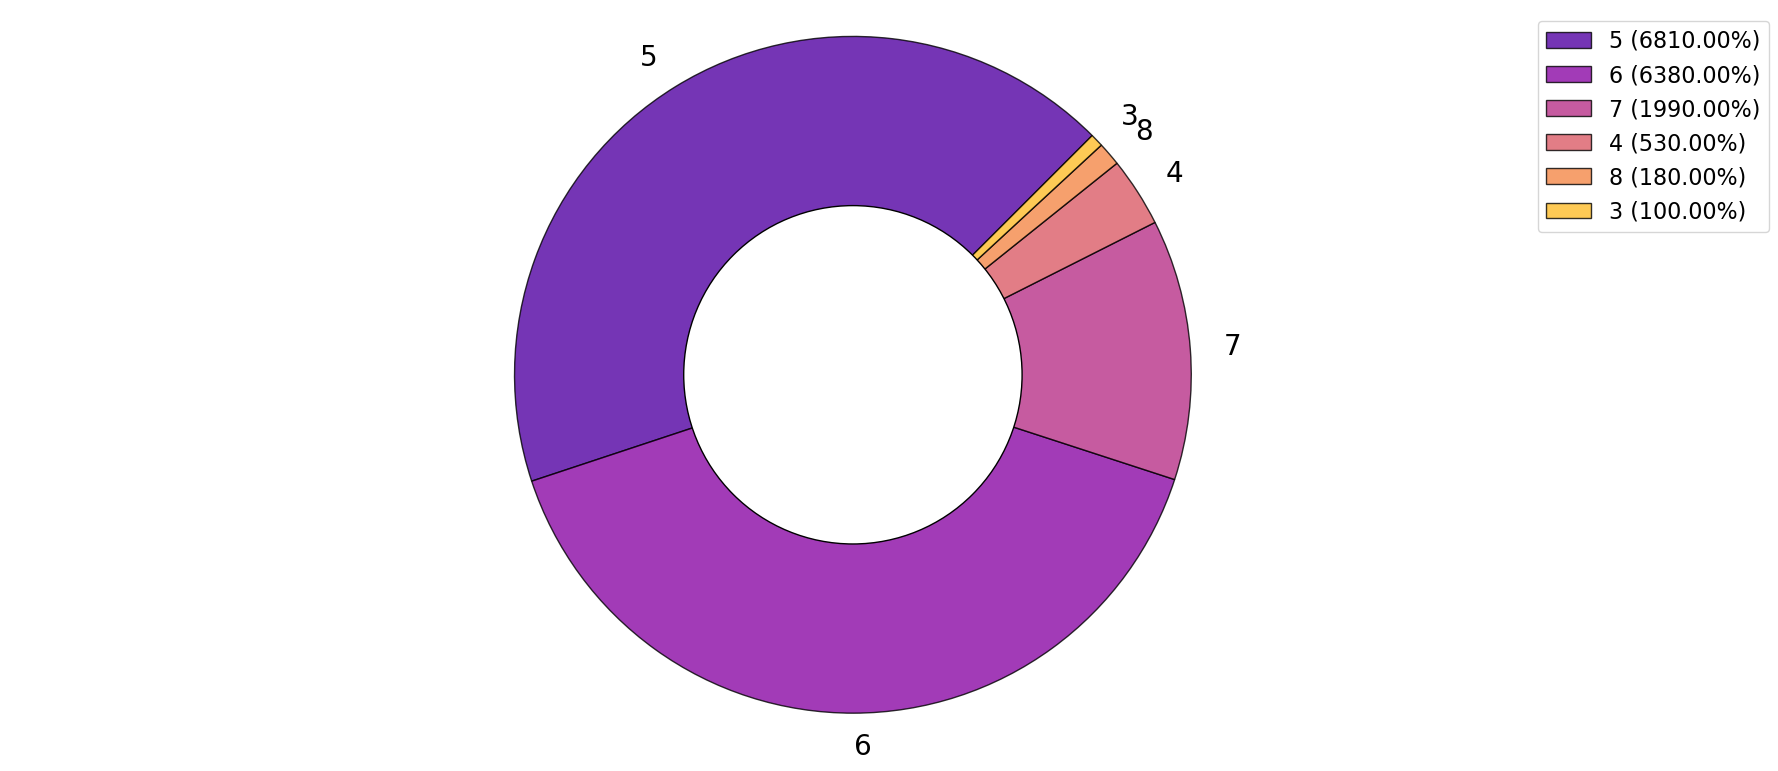

In [13]:
target_count = wine['quality'].value_counts()

fig, ax = plt.subplots(1 , figsize=(18, 8))

plt.pie(target_count , labels=target_count.index , startangle=45 , colors=palette , pctdistance=0.3,
       textprops={'fontsize': 20}, wedgeprops={'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 1} )

plt.axis('equal')  # Ensure the pie is drawn as a circle

# Add the legend with target values and percentage
legend_entries = [f'{label} ({count/len(df)*100:.2f}%)' for label, count in target_count.items()]
plt.legend(legend_entries, bbox_to_anchor=(1.05, 1), loc='best', fontsize=16)


# Draw circle
centre_circle = plt.Circle((0, 0), 0.5, fc='white', edgecolor='black')
fig = plt.gcf()

# Adding circle in Pie chart
fig.gca().add_artist(centre_circle)


# Tighten the layout and show the figure
plt.tight_layout(pad=2)
plt.show()

In [14]:
wine.corr()['quality'].sort_values()


volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


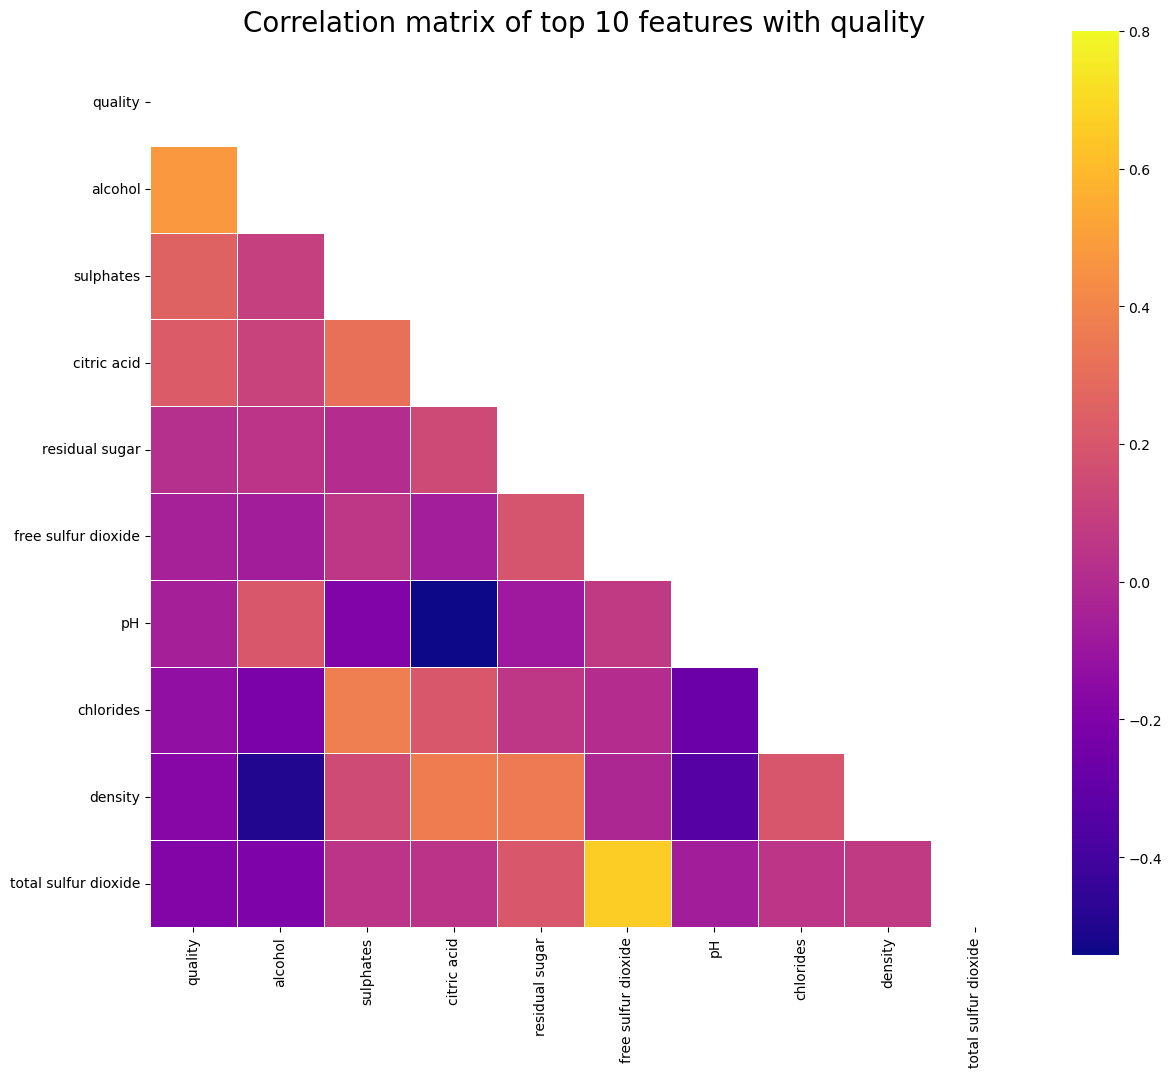

In [16]:
# Assuming 'wine' is already loaded
correlation = wine.corr()
top_k = 10
cols = correlation.nlargest(top_k, 'quality').index

# Compute the correlation matrix for selected columns
corr_matrix = np.corrcoef(wine[cols].to_numpy().T)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plotting
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, vmax=.8, linewidths=0.5, square=True,
            annot=True, cmap='plasma', annot_kws={'size': 12},
            xticklabels=cols, yticklabels=cols)

plt.title(f'Correlation matrix of top {top_k} features with quality', fontsize=20, pad=20)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
plt.show()

In [15]:
correlation = wine.corr()
top_k = 10
cols = correlation.nlargest(top_k, 'quality').index

# Compute the correlation matrix between the selected columns
corr_matrix = np.corrcoef(df[cols].to_numpy().T)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, vmax=.8, linewidths=0.5, square=True, annot=True,
            cmap='plasma', annot_kws={'size': 12}, xticklabels=cols, yticklabels=cols)

# Add title to the plot
plt.title(f'Correlation matrix of top {top_k} features with quality', fontsize=20, pad=20)

# Increase the size of axes values
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

plt.show()

TypeError: list indices must be integers or slices, not Index